In [1]:
import math
import numpy as np
import os
import pprint

from evo.tools import plot
from evo.tools.plot import PlotMode
from evo.core.metrics import PoseRelation, Unit
from evo.tools.settings import SETTINGS
from evo.tools import file_interface
from evo.core import sync
from evo.core.sync import TrajectoryPair

from os import path
from tools.tum_plots import *
from tools.tum_tools import *

# temporarily override some package settings
SETTINGS.plot_figsize = [6, 6]
SETTINGS.plot_split = True
SETTINGS.plot_usetex = True

%load_ext autoreload
%autoreload 2

# magic plot configuration
import matplotlib.pyplot as plt
%matplotlib widget

result_figure_dir = "/mnt/c/Users/J-Dau/OneDrive/TUM/04_SS23/02_MA/02_Figures/08_ch-6-results/01_kiss_analysis/"


## Plotting

### Sub Map

874
879


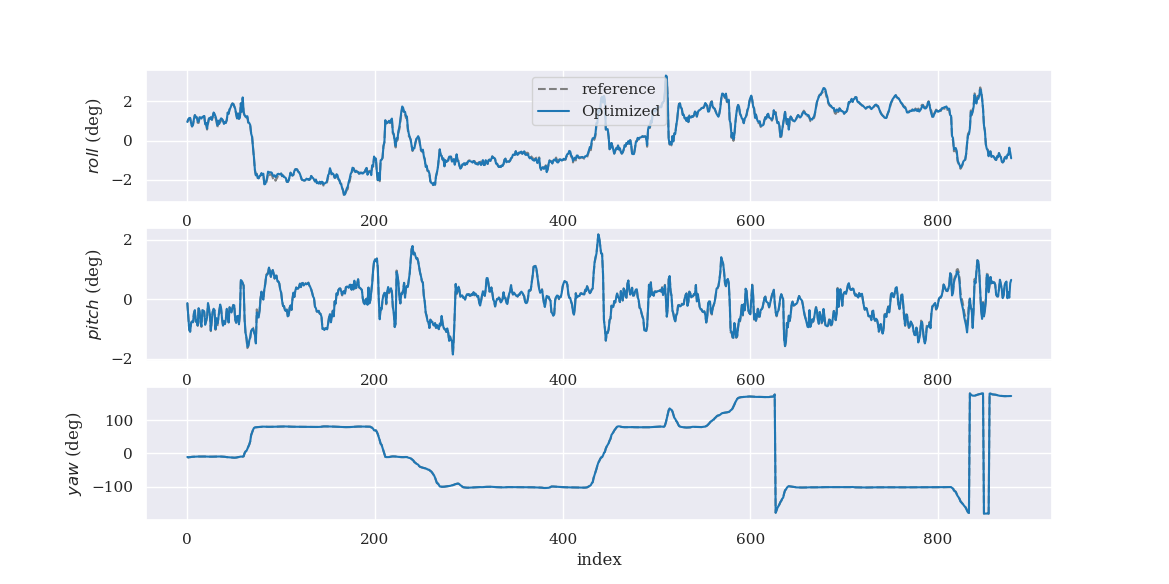

In [6]:


traj_ref = file_interface.read_tum_trajectory_file("data/reference/mdv3_2_reference.tum")
traj_ekf = file_interface.read_tum_trajectory_file("/home/julian/projects/thesis/kiss-icp/tum_eval/data/ekf_analysis/mdv3_2/v2/01-full-merge-ekf-no-feedback/run_02/ekf_pose_with_covariance.tum")

traj_orig = file_interface.read_kitti_poses_file("/home/julian/projects/thesis/datasets/converted/mdv3_1/mdv3_full_merge/debug_poses/submap_original.kitti")


# traj_orig = file_interface.read_kitti_poses_file("/home/julian/projects/thesis/kiss-icp/tum_eval/data/kiss_results/2023-10-05_15-53-49/mdv3_full_merge_poses_kitti.txt")
traj_optim = file_interface.read_kitti_poses_file("/home/julian/projects/thesis/datasets/converted/mdv3_1/mdv3_full_merge/debug_poses/submap_optimized.kitti")

print(traj_orig.num_poses)
print(traj_optim.num_poses)
# print(np.arange(11500, traj_orig.num_poses))




metric = plot_compare((traj_orig, traj_optim), print_stats=False, plot_mode='rpy', est_name="Optimized", wf=2, hf=0.5)
# metric = plot_compare((traj_orig, traj_orig), print_stats=False, plot_mode='rpy', est_name="Optimimized", wf=2, hf=0.5)


Run 1

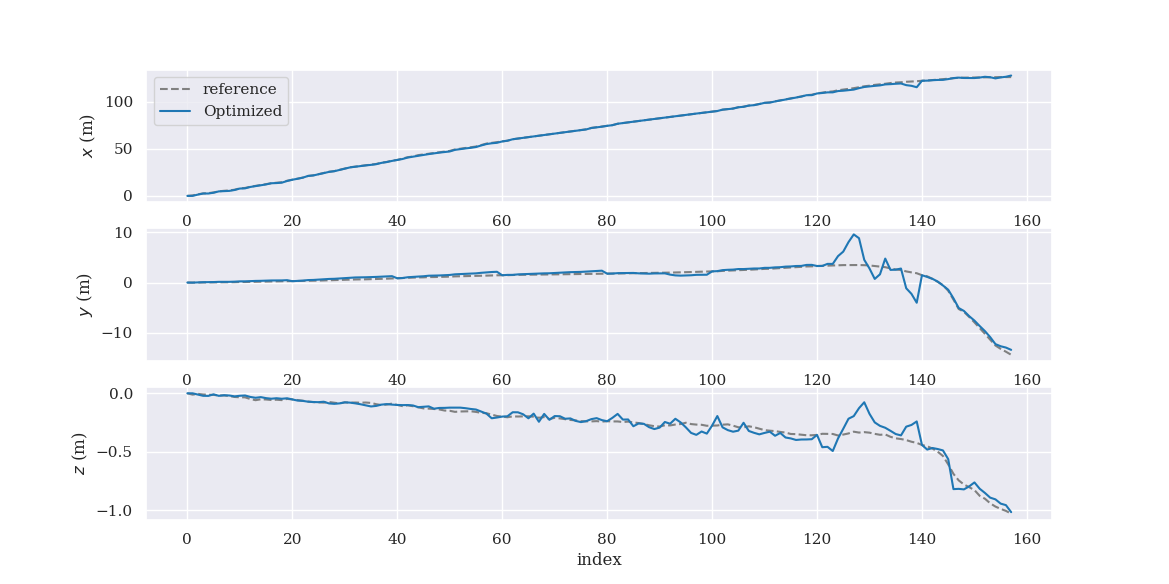

In [179]:
metric = plot_compare((traj_orig, traj_optim), print_stats=False, plot_mode='xyz', est_name="Optimized", wf=2, hf=0.5)

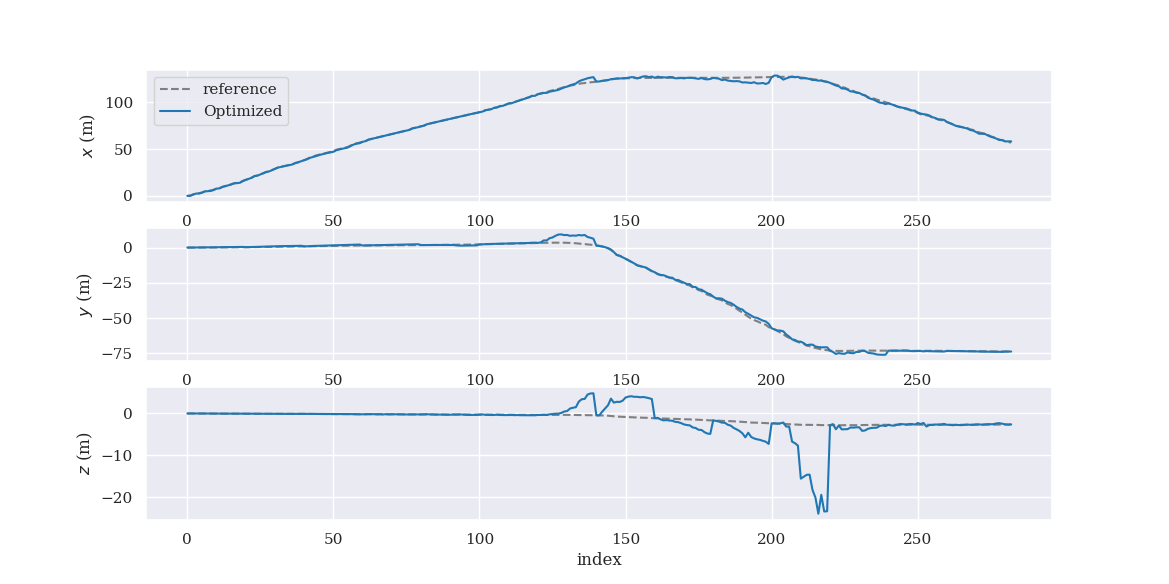

In [171]:
# RUN 06 
metric = plot_compare((traj_orig, traj_optim), print_stats=False, plot_mode='xyz', est_name="Optimized", wf=2, hf=0.5)

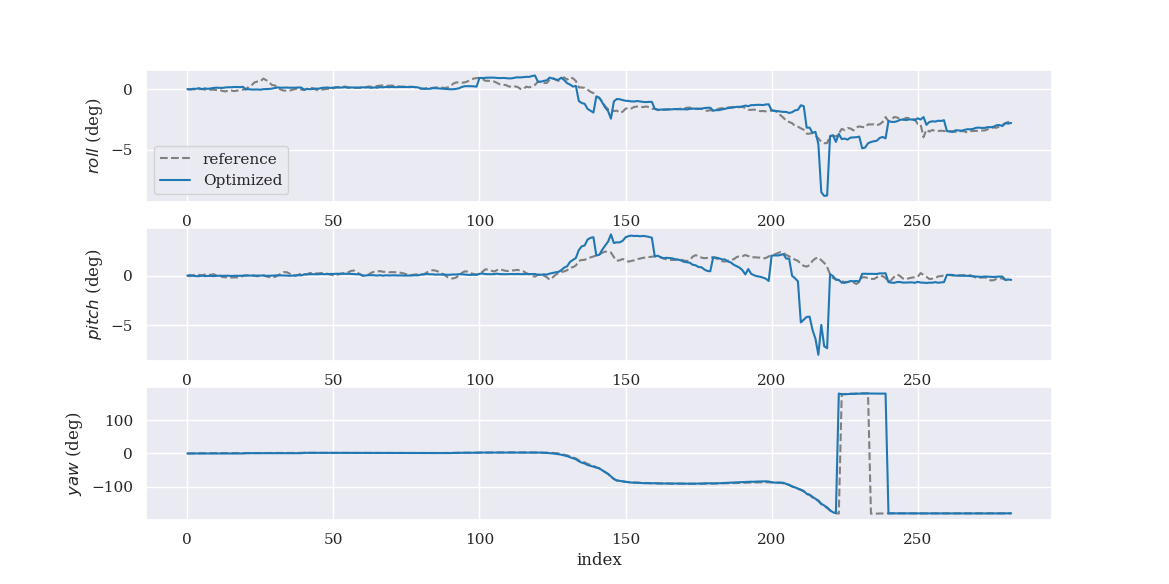

In [172]:
# RUN 06 
metric = plot_compare((traj_orig, traj_optim), print_stats=False, plot_mode='rpy', est_name="Optimized", wf=2, hf=0.5)

So far the best results: Switching the derivative for source and target

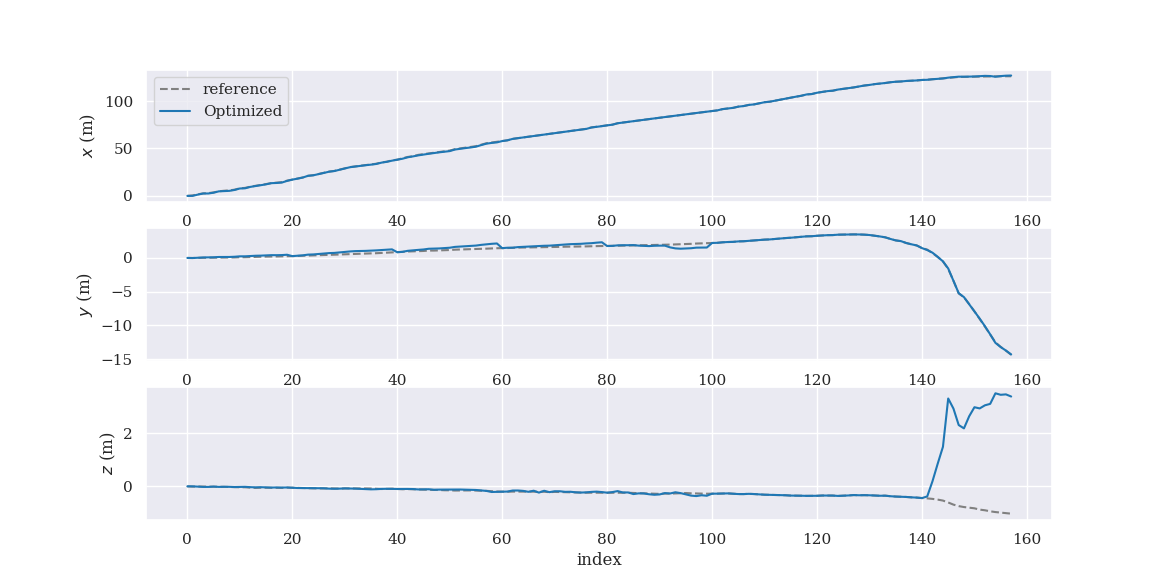

In [109]:
metric = plot_compare((traj_orig, traj_optim), print_stats=False, plot_mode='xyz', est_name="Optimized", wf=2, hf=0.5)

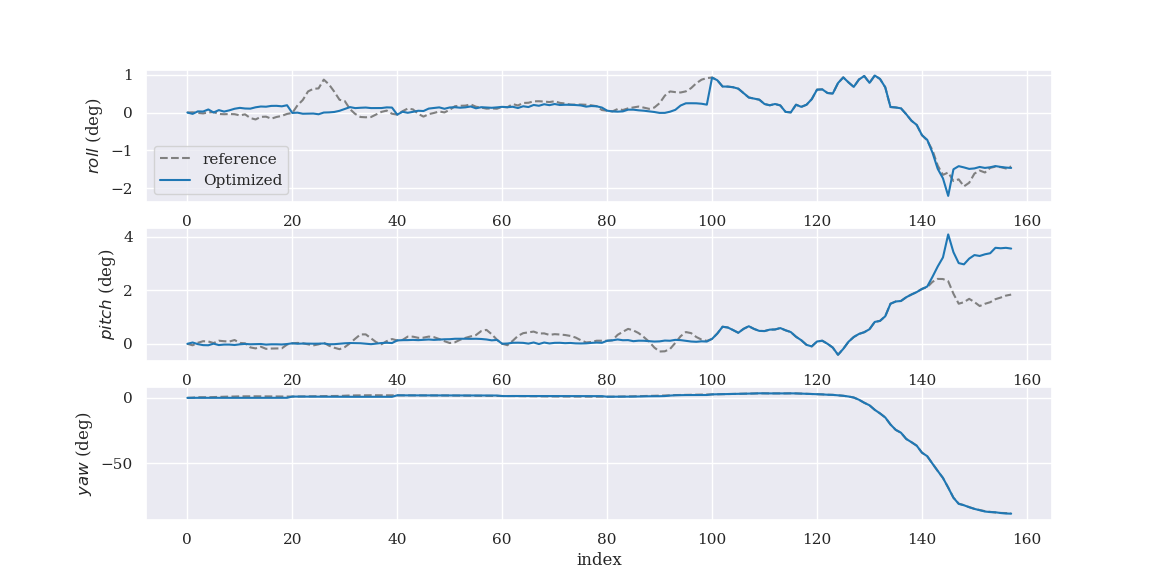

In [110]:
metric = plot_compare((traj_orig, traj_optim), print_stats=False, plot_mode='rpy', est_name="Optimized", wf=2, hf=0.5)

In [ ]:
compare_plot_multiple([traj_ref, traj_ekf, traj_orig, traj_optim], ["GPS", "EKF", "KISS-ICP", "Optimized"], plot_mode='xyz')

## Full Map

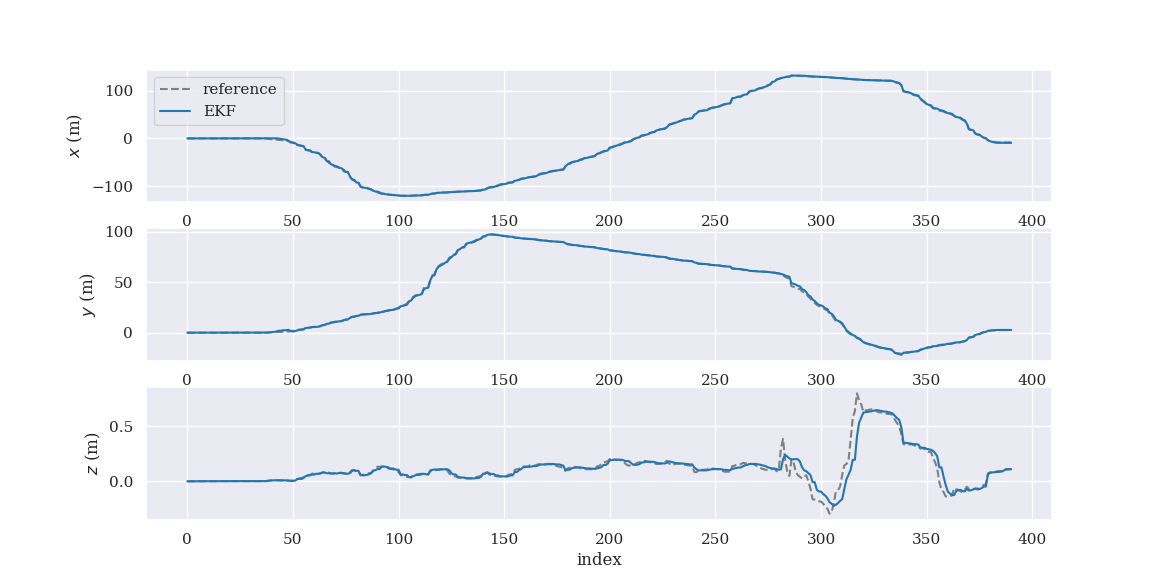

In [27]:

traj_ref = file_interface.read_tum_trajectory_file("data/reference/mdv3_2_reference.tum")
traj_ekf = file_interface.read_tum_trajectory_file("/home/julian/projects/thesis/kiss-icp/tum_eval/data/ekf_analysis/mdv3_2/v2/01-full-merge-ekf-no-feedback/run_02/ekf_pose_with_covariance.tum")

# traj_orig = file_interface.read_tum_trajectory_file("/home/julian/projects/thesis/datasets/converted/mdv3_2/mdv3_full_merge/debug_poses/map_poses_original.tum")
# traj_optim = file_interface.read_tum_trajectory_file("/home/julian/projects/thesis/datasets/converted/mdv3_2/mdv3_full_merge/debug_poses/map_poses_optimized.tum")



# metric = plot_compare((traj_ref, traj_ekf), print_stats=False, plot_mode='xyz', est_name="EKF", wf=2, hf=0.5)
metric = plot_compare((traj_orig, traj_optim), print_stats=False, plot_mode='xyz', est_name="Optimimized", wf=2, hf=0.5)

In [16]:
# Convert csv to tum format

import csv 

csv_f = "/home/julian/projects/thesis/datasets/ext/newer_college/2020-ouster-os1-64-realsense/01_short_experiment/ground_truth/registered_poses.csv"
tum_f = "/home/julian/projects/thesis/datasets/ext/newer_college/2020-ouster-os1-64-realsense/01_short_experiment/raw_format/poses.tum"

tum_list = []
with open(csv_f, 'r') as f:
    reader = csv.reader(f, delimiter=',')
    for i, row in enumerate(reader):
        if i == 0: continue
        # secs = int(row[0]) - 1583836591
        t = str(int(row[0]) + int(row[1])*1e-9)
        # data = [float(d) for d in row[2:]]
        tum_list.append(" ".join([t, *row[2:]]))

print(tum_list[0])     
with open(tum_f, 'w') as f:
    f.writelines("\n".join(tum_list)) 
        

1583836591.182591 -3.35559 8.2542 0.145701 0.0039575 0.00400042 -0.605941 0.79549
